# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [9]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('credit_risk_dataset.csv', sep=None, engine='python')

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


In [10]:
df.shape

(32581, 12)

In [11]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
df['loan_status'].value_counts()

(df['loan_status'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_status,
0,78.18
1,21.82



---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


# **1**

In [14]:
missing = df.isnull().sum()
missing[missing > 0]

,0
person_emp_length,895
loan_int_rate,3116


In [15]:
missing_pct = df.isna().mean() * 100
missing_pct.sort_values(ascending=False)

,0
loan_int_rate,9.563856
person_emp_length,2.747000
person_income,0.000000
person_age,0.000000
person_home_ownership,0.000000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_status,0.000000
loan_percent_income,0.000000


In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


# **2**

In [18]:
df[num_cols].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


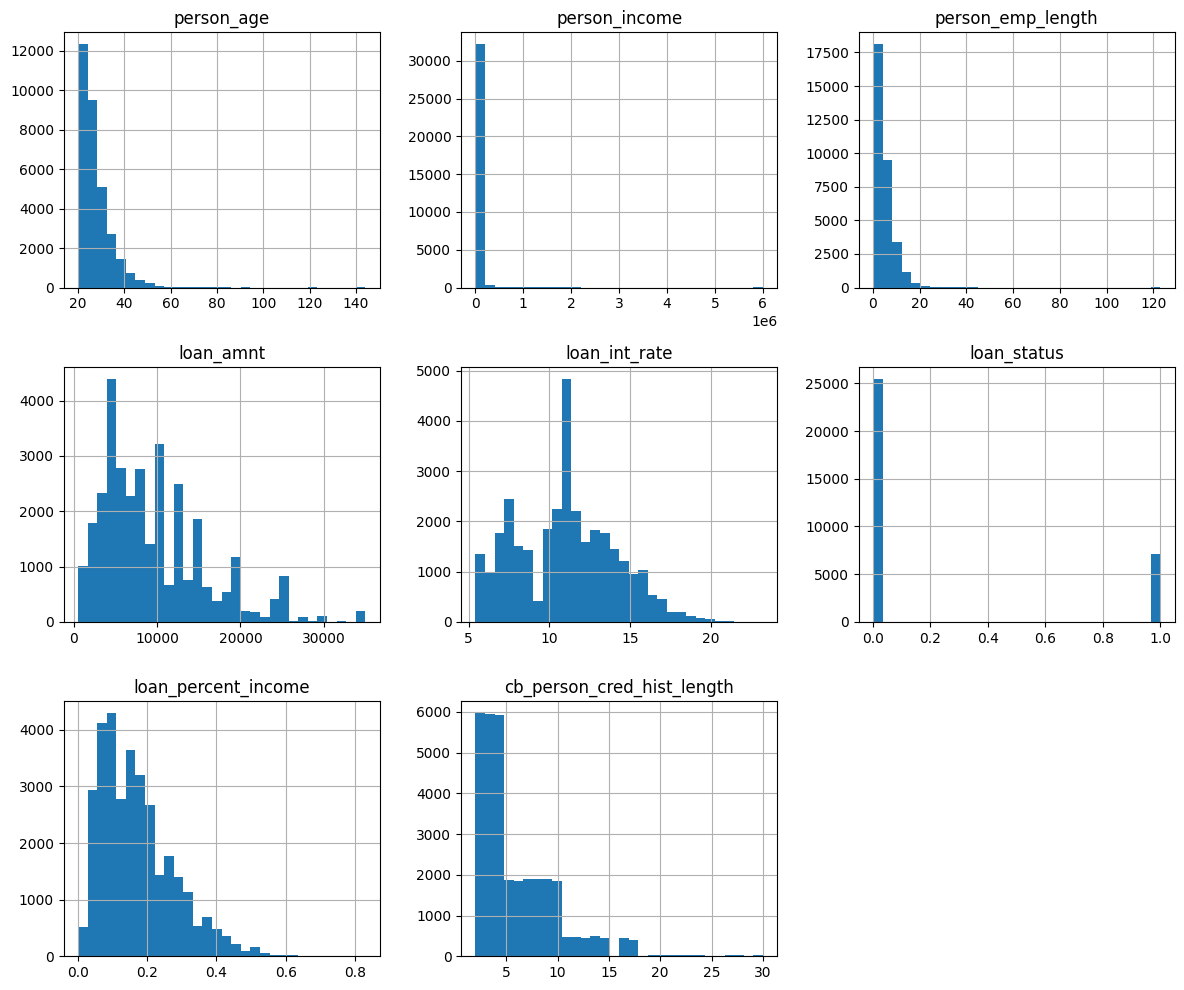

In [19]:
df[num_cols].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [20]:
# більшість числових ознак мають правоскошений розподіл.
# це вказує на наявність великих значень (викидів), характерних для фінансових даних.

# **3**

In [21]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-22550.0), np.float64(140250.0))

In [22]:
outliers = df[(df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)]
len(outliers)

1484

In [23]:
df['person_income_capped'] = df['person_income'].clip(lower=lower_bound, upper=upper_bound)

# **4**

In [24]:
for col in cat_cols:
    print(f'\n{col}')
    print(df[col].value_counts(normalize=True) * 100)


person_home_ownership
person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64

loan_intent
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: proportion, dtype: float64

loan_grade
loan_grade
A    33.077561
B    32.076977
C    19.821368
D    11.129186
E     2.958780
F     0.739695
G     0.196434
Name: proportion, dtype: float64

cb_person_default_on_file
cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64


In [25]:
pd.crosstab(df['loan_status'], df['loan_grade'], normalize='columns') * 100

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,90.043611,83.724046,79.266027,40.95422,35.580913,29.460581,1.5625
1,9.956389,16.275954,20.733973,59.04578,64.419087,70.539419,98.4375


In [26]:
# аналіз категоріальної змінної loan_grade показав сильну залежність від цільової змінної loan_status.
# частка дефолтів монотонно зростає від категорії A до G: для рейтингів A–C частка дефолтів становить 10–21%,
# тоді як для рейтингів D–G перевищує 59% і сягає майже 100% для категорії G.
# водночас категорія G має дуже високий відсоток дефолтів, що може свідчити або про дуже малу кількість
# спостережень у цій групі, або про екстремально ризиковий сегмент клієнтів.
# доцільно перевірити розмір вибірки для цієї категорії перед використанням моделі в продакшені.

In [27]:
df['loan_grade'].value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [28]:
# категорія G представлена дуже малою кількістю спостережень порівняно з іншими категоріями.
# високий відсоток дефолтів у цій групі може частково бути наслідком малої вибірки,
# тому результати для цього сегменту слід інтерпретувати з обережністю

# **5**

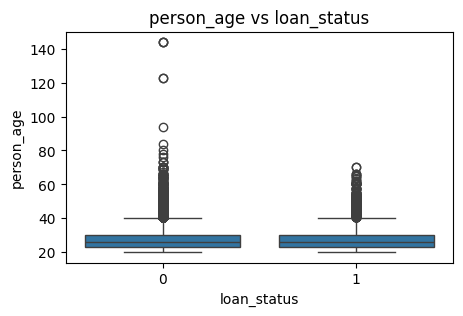

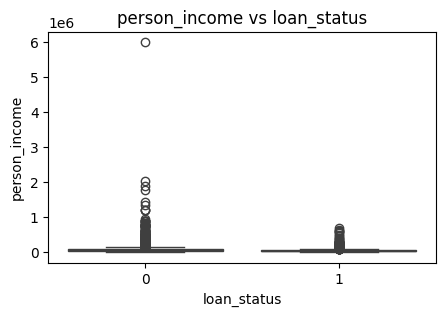

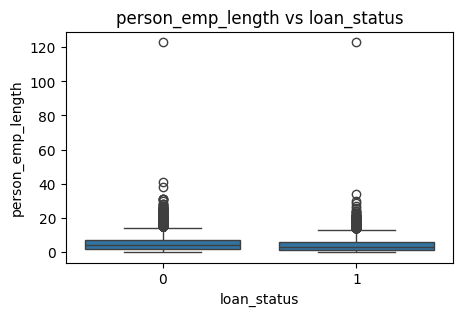

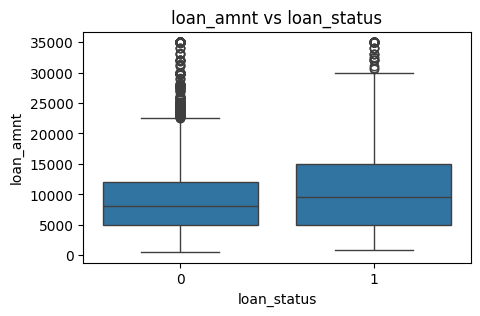

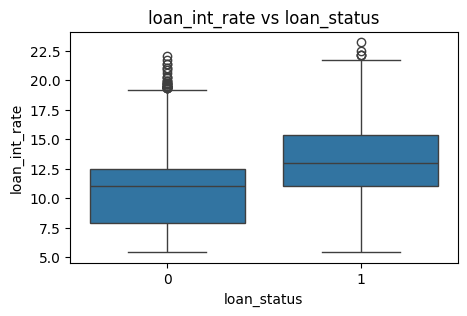

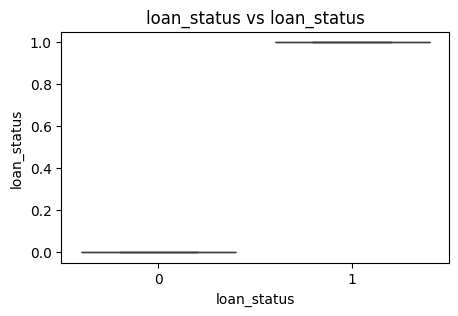

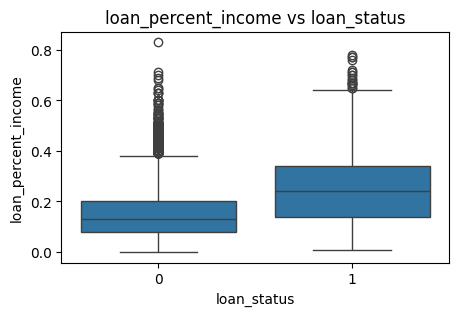

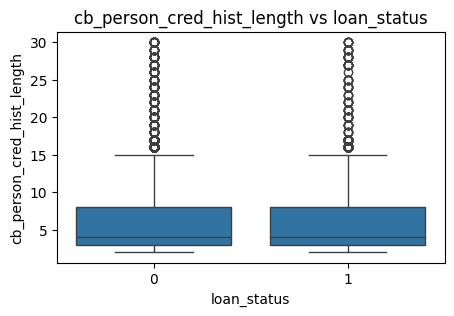

In [29]:
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs loan_status')
    plt.show()

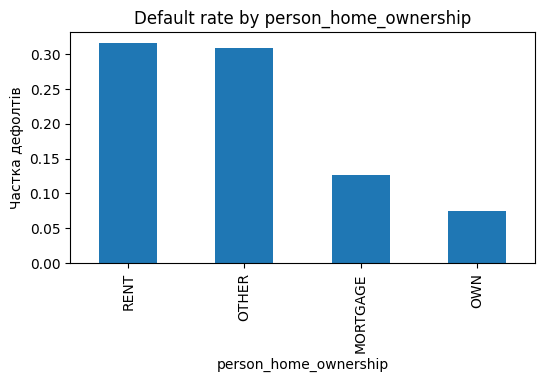

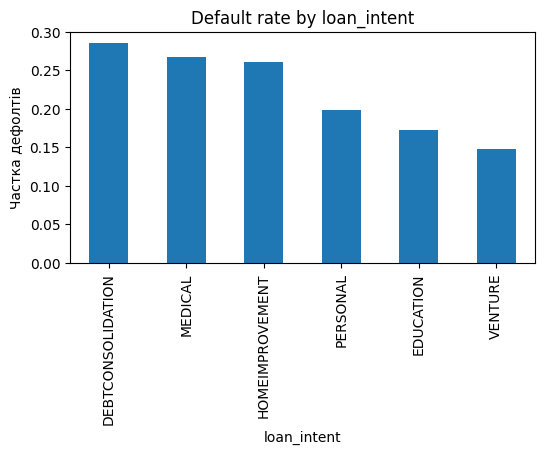

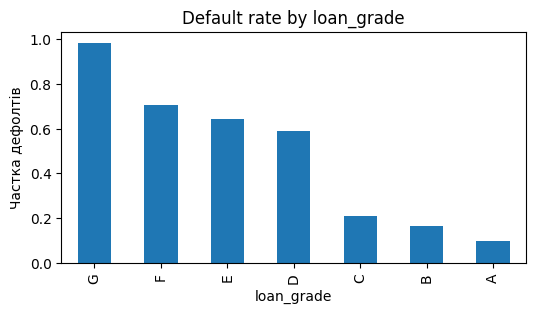

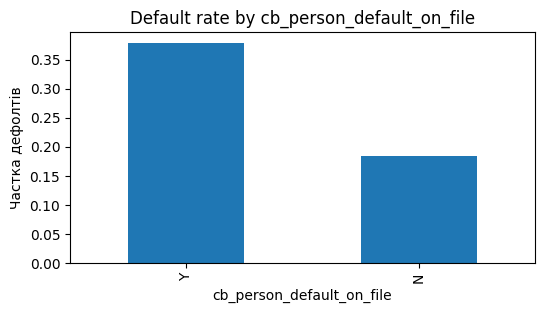

In [30]:
for col in cat_cols:
    prop_df = (
        df.groupby(col)['loan_status']
        .mean()
        .sort_values(ascending=False)
    )

    prop_df.plot(kind='bar', figsize=(6, 3), title=f'Default rate by {col}')
    plt.ylabel('Частка дефолтів')
    plt.show()


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



# **1**

In [31]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_income_capped'],
      dtype='object')

In [32]:
corr_matrix = df[num_cols].corr()
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income_capped
person_age,1.000000,0.173202,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133,0.117981
person_income,0.173202,1.000000,0.135164,0.266820,0.000746,-0.144449,-0.254471,0.117987,0.657515
person_emp_length,0.161454,0.135164,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069,0.198751
loan_amnt,0.050787,0.266820,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967,0.420091
loan_int_rate,0.011853,0.000746,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762,-0.017050
loan_status,-0.021629,-0.144449,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529,-0.245934
loan_percent_income,-0.042411,-0.254471,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690,-0.367245
cb_person_cred_hist_length,0.859133,0.117987,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000,0.093901
person_income_capped,0.117981,0.657515,0.198751,0.420091,-0.017050,-0.245934,-0.367245,0.093901,1.000000


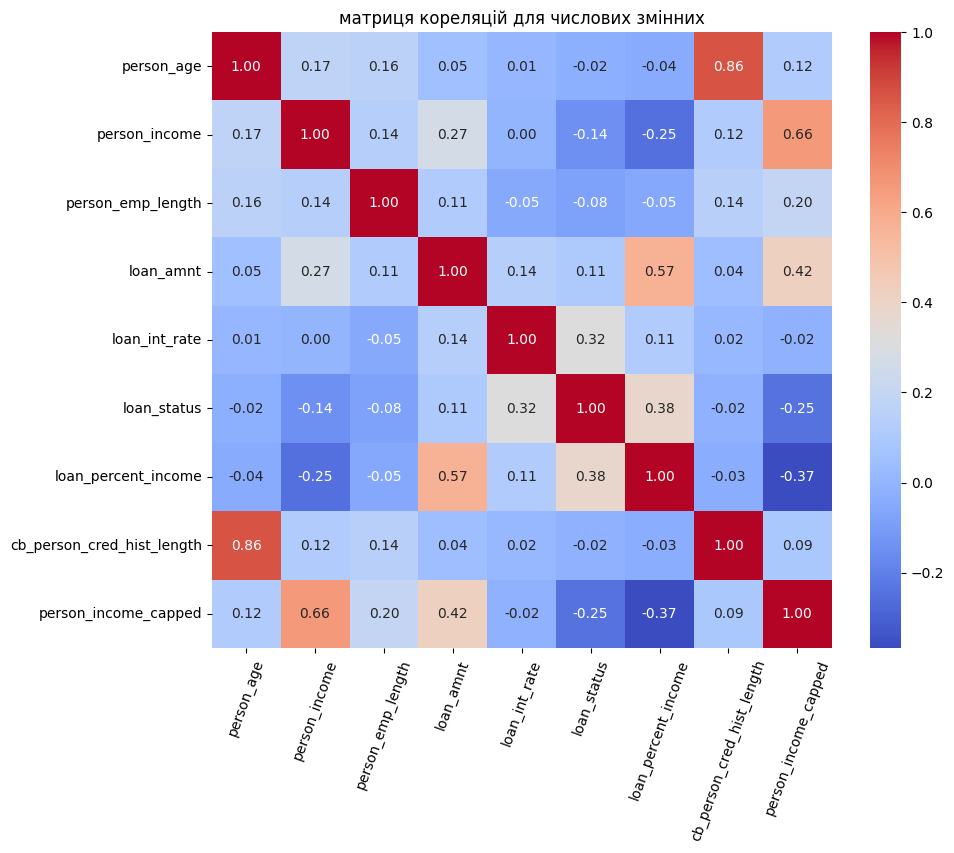

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=70)
plt.title('матриця кореляцій для числових змінних')
plt.show()

# **2**

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [35]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# **3**

In [36]:
target = 'loan_status'

In [37]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [38]:
# для побудови моделі було використано всі доступні числові ознаки та закодовані категоріальні змінні,
# оскільки всі вони мають потенційний зв'язок з кредитоспроможністю клієнта.
# ознаки з великою кількістю категорій у датасеті відсутні, тому всі категоріальні змінні
# були закодовані за допомогою One-Hot Encoding. цільова змінна loan_status була виключена з набору ознак


---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



# **2**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4**

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

# **5**

In [42]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [43]:
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

In [44]:
y_test_pred[:10], y_test_proba[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0.3306141 , 0.23903193, 0.03279776, 0.21017944, 0.02724648,
        0.34067415, 0.10088669, 0.14410482, 0.06668062, 0.94186892]))


---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


# **1**

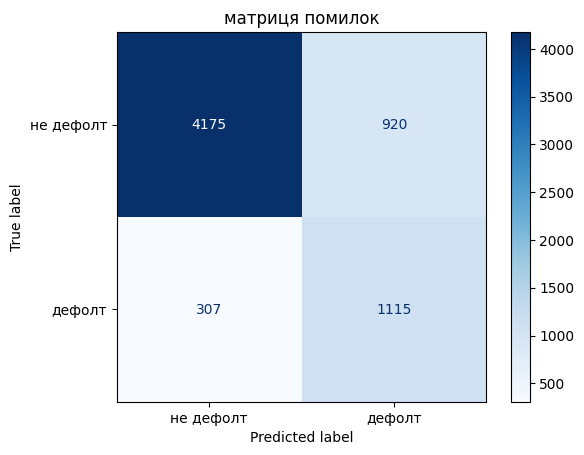

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['не дефолт', 'дефолт'])
disp.plot(cmap='Blues')
plt.title('матриця помилок')
plt.show()

# **2**

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("МЕТРИКИ ЯКОСТІ МОДЕЛІ:")
print(f"Accuracy (Точність):    {accuracy:.3f}")
print(f"Precision (Влучність):  {precision:.3f}")
print(f"Recall (Повнота):       {recall:.3f}")
print(f"F1-score:               {f1:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ:
Accuracy (Точність):    0.812
Precision (Влучність):  0.548
Recall (Повнота):       0.784
F1-score:               0.645


# **3**

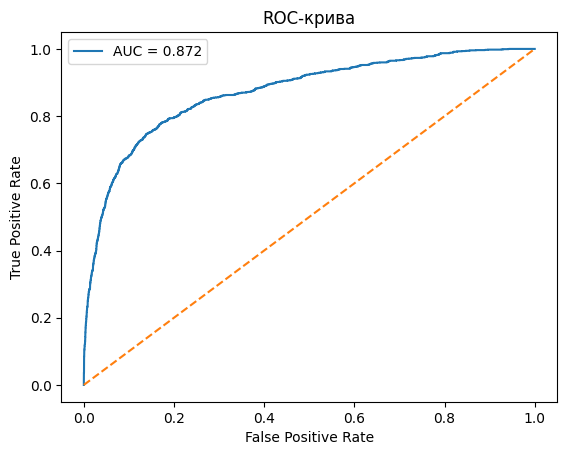

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива")
plt.legend()
plt.show()

In [48]:
# AUC = 0.872, тому можемо сказати що у нас хороша модель

# **4**

In [49]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)

feature_importance

,0
loan_percent_income,1.159905
loan_grade_D,0.809810
loan_grade_E,0.488599
person_home_ownership_OWN,-0.435312
loan_amnt,-0.422402
loan_intent_VENTURE,-0.395873
person_income_capped,-0.348163
person_home_ownership_RENT,0.321254
loan_grade_F,0.286364
loan_grade_G,0.265848


In [50]:
# loan_percent_income має найбільший позитивний коефіцієнт, що означає: чим більша частка доходу йде на кредит,
# тим вищий ризик дефолту, що цілком логічно.
# також бачимо, що найбільші негативні коефіцієнти (=найменші ризики дефолту) мають person_home_ownership_OWN, loan_amnt,
# (тобто люди, що мають власне житло та беруть кредит на більшу суму), що теж цілком передбачувано.
# разом з тим спостерігаємо, що довжина кредитної історії та стаж роботи майже не впливають на ризик дефолту.


---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



In [61]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

results = []

for t in thresholds:
    y_pred_thresh = (y_test_proba >= t).astype(int)

    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    results.append([t, precision, recall, f1])

metrics_df = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1"])
metrics_df

,threshold,precision,recall,f1
0,0.2,0.673864,0.834037,0.745443
1,0.3,0.809628,0.780591,0.794844
2,0.4,0.900506,0.751055,0.819018
3,0.5,0.948339,0.722925,0.820431
4,0.6,0.977451,0.701125,0.816544


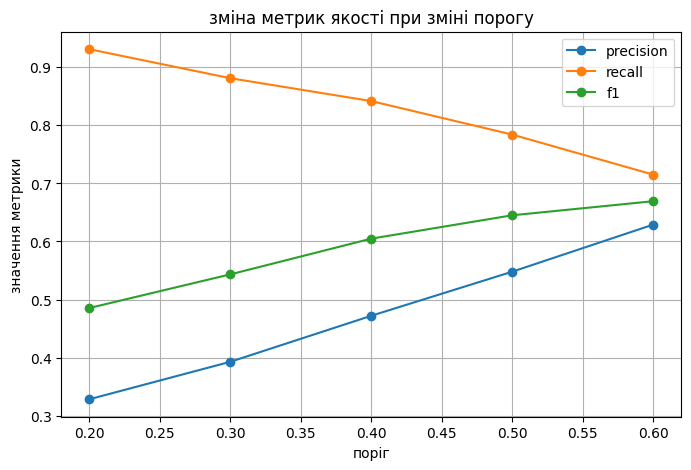

In [56]:
plt.figure(figsize=(8, 5))

plt.plot(metrics_df["threshold"], metrics_df["precision"], marker="o", label="precision")
plt.plot(metrics_df["threshold"], metrics_df["recall"], marker="o", label="recall")
plt.plot(metrics_df["threshold"], metrics_df["f1"], marker="o", label="f1")

plt.xlabel("поріг")
plt.ylabel("значення метрики")
plt.title("зміна метрик якості при зміні порогу")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
best_row = metrics_df.loc[metrics_df["f1"].idxmax()]
best_row

,4
threshold,0.600000
precision,0.628942
recall,0.715190
f1,0.669299


In [58]:
# аналіз метрик при різних порогах показав, що зі збільшенням порогу precision зростає,
# а recall зменшується, що відображає компроміс між кількістю хибних спрацьовувань та кількістю пропущених дефолтів.
# чисто технічно максимальне значення F1 досягається при порозі 0.669, однак для бізнес-задачі
# доцільніше обрати поріг 0.4–0.5, оскільки нам важливіше виявляти більший відсоток клієнтів, що потенційно знаходяться в групі ризику,
# ніж втрачати хороших.


---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)})

results_df = pd.DataFrame(results)
results_df

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.867270,0.767531,0.561885,0.648802,0.870026
1,Decision Tree,0.887678,0.731855,0.765823,0.748454,0.843755
2,Random Forest,0.931257,0.952602,0.720816,0.820657,0.936317


In [63]:
threshold = 0.4

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)})

pd.DataFrame(results)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.861132,0.697178,0.642757,0.668862,0.870026
1,Decision Tree,0.887678,0.731855,0.765823,0.748454,0.843755
2,Random Forest,0.927574,0.900506,0.751055,0.819018,0.936317


In [66]:
# найкращі результати на тестовій вибірці демонструє Random Forest, зокрема за метриками ROC-AUC та f1
# логістична регресія поступається попередній моделі за якістю розділення класів,
# а Decision Tree має гіршу здатність до узагальнення.
# зменшення порогу зі стандартного 0.5 до оптимального 0.4 призводить до зростання
# recall та зменшення precision, що відповідає очікуваному компромісу між кількістю виявлених дефолтів та кількістю хибних спрацьовувань
# (виключенням є Decision Tree, там в обох варіантах значення не змінюються).
# таким чином, Random Forest є найбільш доцільною моделлю для даної задачі,
# а коректний вибір порогу дозволяє адаптувати поведінку моделі під бізнес-вимоги